In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

from sklearn.feature_extraction.text import CountVectorizer

from wordcloud import WordCloud

from collections import Counter

sns.set_style("whitegrid")


In [ ]:
ds = load_dataset("MLBtrio/genz-slang-dataset", split="train")
df = ds.to_pandas()

print(df.head())
print("\nDataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

all_slangs.csv: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/1779 [00:00<?, ? examples/s]

     Slang                                        Description  \
0        W                                  Shorthand for win   
1        L                          Shorthand for loss/losing   
2  L+ratio  Response to a comment or action on the interne...   
3     Dank                  excellent or of very high quality   
4   Cheugy  Derogatory term for Millennials. Used when mil...   

                                             Example  \
0                          Got the job today, big W!   
1           I forgot my wallet at home, that’s an L.   
2  Your tweet got 5 likes and 100 replies calling...   
3                              That meme is so dank!   
4  That phrase is so cheugy, no one says that any...   

                                             Context  
0  Typically used in conversations to celebrate s...  
1  Often used when referring to a failure or mish...  
2  Popularized on social media platforms to signi...  
3  Commonly used in internet slang to refer to me...

In [ ]:
print(df.columns.tolist())

['Slang', 'Description', 'Example', 'Context']


count    1779.000000
mean        3.736931
std         1.811239
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max        25.000000
Name: slang_len_chars, dtype: float64
slang_len_words
1    1738
2      33
3       7
4       1
Name: count, dtype: int64


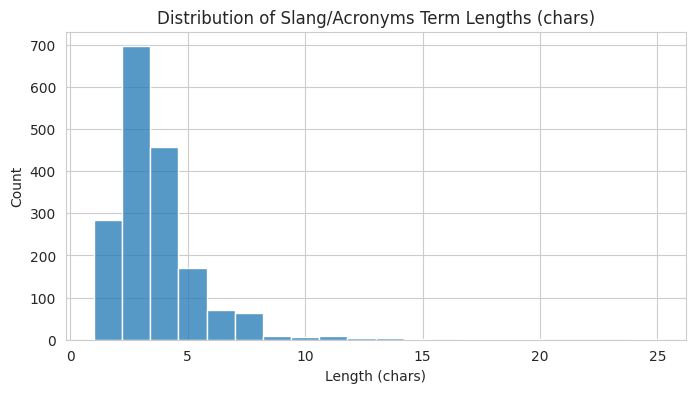

In [ ]:
df.columns = [c.lower().strip() for c in df.columns]

if "slang/acronym" in df.columns:
    slang_col = "slang/acronym"
elif "slang" in df.columns:
    slang_col = "slang"
else:
    slang_col = df.columns[0]

df["slang_len_chars"] = df[slang_col].apply(
    lambda x: len(x) if isinstance(x, str) else 0
)
df["slang_len_words"] = df[slang_col].apply(
    lambda x: len(x.split()) if isinstance(x, str) else 0
)

print(df["slang_len_chars"].describe())
print(df["slang_len_words"].value_counts().head())

plt.figure(figsize=(8, 4))
sns.histplot(df["slang_len_chars"], bins=20, kde=False)
plt.title("Distribution of Slang/Acronyms Term Lengths (chars)")
plt.xlabel("Length (chars)")
plt.ylabel("Count")
plt.show()


Acronym counts:
 is_acronym
True     1359
False     420
Name: count, dtype: int64


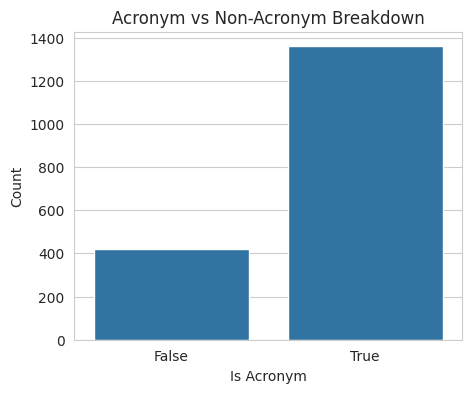

In [ ]:
def is_acronym(term):
    if isinstance(term, str):
        return term.isupper() and len(term) > 1 and term.isalpha()
    return False


df["is_acronym"] = df[slang_col].apply(is_acronym)

counts = df["is_acronym"].value_counts()
print("Acronym counts:\n", counts)

plt.figure(figsize=(5, 4))
sns.countplot(x="is_acronym", data=df)
plt.title("Acronym vs Non-Acronym Breakdown")
plt.xlabel("Is Acronym")
plt.ylabel("Count")
plt.show()

📘 Example length (words):
 count    1779.000000
mean        6.389545
std         1.965828
min         2.000000
25%         5.000000
50%         6.000000
75%         8.000000
max        14.000000
Name: example_len_words, dtype: float64

📙 Context length (words):
 count    1779.000000
mean       11.169758
std         2.947872
min         4.000000
25%         9.000000
50%        11.000000
75%        13.000000
max        28.000000
Name: context_len_words, dtype: float64


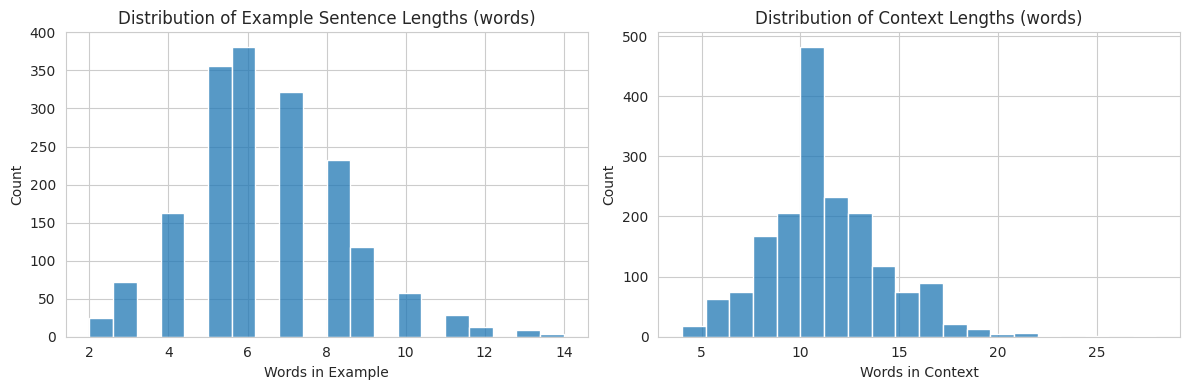

In [ ]:
df.columns = [c.lower().strip() for c in df.columns]

if "example" in df.columns:
    example_col = "example"
else:
    example_col = [c for c in df.columns if "example" in c][0]

if "context" in df.columns:
    context_col = "context"
else:
    context_col = [c for c in df.columns if "context" in c][0]

df["example_len_words"] = df[example_col].apply(
    lambda x: len(x.split()) if isinstance(x, str) else 0
)
df["context_len_words"] = df[context_col].apply(
    lambda x: len(x.split()) if isinstance(x, str) else 0
)

print("📘 Example length (words):\n", df["example_len_words"].describe())
print("\n📙 Context length (words):\n", df["context_len_words"].describe())

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df["example_len_words"], bins=20)
plt.title("Distribution of Example Sentence Lengths (words)")
plt.xlabel("Words in Example")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.histplot(df["context_len_words"], bins=20)
plt.title("Distribution of Context Lengths (words)")
plt.xlabel("Words in Context")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [ ]:
df.columns = [c.lower().strip() for c in df.columns]

if "slang/acronym" in df.columns:
    slang_col = "slang/acronym"
elif "slang" in df.columns:
    slang_col = "slang"
else:
    slang_col = df.columns[0]

if "example" in df.columns:
    example_col = "example"
else:
    example_col = [c for c in df.columns if "example" in c][0]

if "context" in df.columns:
    context_col = "context"
else:
    context_col = [c for c in df.columns if "context" in c][0]

In [ ]:
print("🟢 Shortest slang terms:")
print(df.nsmallest(5, "slang_len_chars")[[slang_col, "slang_len_chars"]])

print("\n🔵 Longest slang terms:")
print(df.nlargest(5, "slang_len_chars")[[slang_col, "slang_len_chars"]])

print("\n🟣 Longest example sentences:")
print(
    df.nlargest(5, "example_len_words")[[slang_col, example_col, "example_len_words"]]
)

print("\n🟠 Longest context descriptions:")
print(
    df.nlargest(5, "context_len_words")[[slang_col, context_col, "context_len_words"]]
)


🟢 Shortest slang terms:
    slang  slang_len_chars
0       W                1
1       L                1
203     U                1
233     ?                1
257     2                1

🔵 Longest slang terms:
                         slang  slang_len_chars
76   Understood the assignment               25
45        This ain’t it, chief               20
34          Take several seats               18
19           Catch these hands               17
120            Hot girl summer               15

🟣 Longest example sentences:
          slang                                            example  \
2       L+ratio  Your tweet got 5 likes and 100 replies calling...   
86        Clown  I waited all day for him to text me back. I’m ...   
912         IAC  I don’t have the answer right now, but IAC, we...   
1778       ZZZZ  I was so tired, I went to bed and was out in s...   
27    Big yikes  She wore the same dress as the bride at the we...   

      example_len_words  
2                    14  

In [ ]:
from IPython.display import display

display(df.nsmallest(5, "slang_len_chars")[[slang_col, "slang_len_chars"]])

,slang,slang_len_chars
0,W,1
1,L,1
203,U,1
233,?,1
257,2,1


In [ ]:
from textblob import TextBlob

df["example_sentiment"] = df["example"].apply(lambda x: TextBlob(x).sentiment.polarity)

print(df["example_sentiment"].describe())

count    1779.000000
mean        0.064838
std         0.280345
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: example_sentiment, dtype: float64


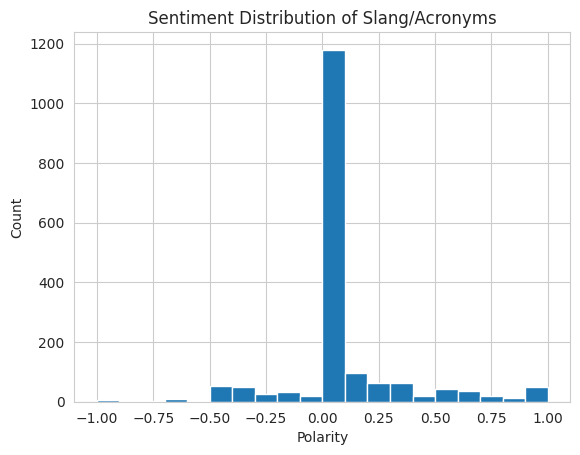

In [ ]:
plt.hist(df["example_sentiment"], bins=20)
plt.title("Sentiment Distribution of Slang/Acronyms")
plt.xlabel("Polarity")
plt.ylabel("Count")
plt.show()

In [ ]:
print("\n--- Starting Sampling and Saving to CSV ---")

shortest_slang = df.nsmallest(5, "slang_len_chars")
shortest_slang_csv = "shortest_slang.csv"
shortest_slang.to_csv(shortest_slang_csv, index=False)
print(f"\n🟢 Shortest Slang Terms saved to '{shortest_slang_csv}':")
display(shortest_slang[[slang_col, "description"]])

longest_slang = df.nlargest(5, "slang_len_chars")
longest_slang_csv = "longest_slang.csv"
longest_slang.to_csv(longest_slang_csv, index=False)
print(f"\n🔵 Longest Slang Terms saved to '{longest_slang_csv}':")
display(longest_slang[[slang_col, "description"]])

top_acronyms = df[df["is_acronym"] == True].head(5)
top_acronyms_csv = "top_acronyms.csv"
top_acronyms.to_csv(top_acronyms_csv, index=False)
print(f"\n🟣 Top Acronyms saved to '{top_acronyms_csv}':")
display(top_acronyms[[slang_col, "description"]])

top_non_acronyms = df[df["is_acronym"] == False].head(5)
top_non_acronyms_csv = "top_non_acronyms.csv"
top_non_acronyms.to_csv(top_non_acronyms_csv, index=False)
print(f"\n🟠 Top Non-Acronyms saved to '{top_non_acronyms_csv}':")
display(top_non_acronyms[[slang_col, "description"]])

print(
    "\n✅ All 4 sample CSV files have been created. Please use the download links to access them."
)


--- Starting Sampling and Saving to CSV ---

🟢 Shortest Slang Terms saved to 'shortest_slang.csv':


,slang,description
0,W,Shorthand for win
1,L,Shorthand for loss/losing
203,U,You
233,?,I don’t understand what you mean
257,2,to



🔵 Longest Slang Terms saved to 'longest_slang.csv':


,slang,description
76,Understood the assignment,To understand what was supposed to be done; to...
45,"This ain’t it, chief",Another way of giving disapproval for something.
34,Take several seats,"If someone is really getting on your nerves, y..."
19,Catch these hands,Used to threaten physical combat with someone
120,Hot girl summer,Hands down one of the biggest slang terms to h...



🟣 Top Acronyms saved to 'top_acronyms.csv':


,slang,description
5,TFW,That feeling when
66,NPC,Someone who cannot think for themselves and/or...
92,IRL,In Real Life
97,NGL,Not Gonna Lie
104,TBH,short for “to be honest” and is usually used w...



🟠 Top Non-Acronyms saved to 'top_non_acronyms.csv':


,slang,description
0,W,Shorthand for win
1,L,Shorthand for loss/losing
2,L+ratio,Response to a comment or action on the interne...
3,Dank,excellent or of very high quality
4,Cheugy,Derogatory term for Millennials. Used when mil...



✅ All 4 sample CSV files have been created. Please use the download links to access them.
